In [1]:
import tensorflow as tf
import numpy as np
import Normal_Distribution_Data as data
import matplotlib.pyplot as plt

In [2]:
#load input data for function
training = data.create_training_set(1000, 100)
x_train = training[0]
mu_train = training[1] 
alpha_train = training[2] 
beta_train = training[3]
y_train = np.vstack((mu_train, alpha_train, beta_train))  
y_train = y_train.T 

testing = data.create_training_set(300, 100)
x_test = testing[0] 
mu_test = testing[1] 
alpha_test = testing[2] 
beta_test = testing[3] 
y_test = np.vstack((mu_test, alpha_test, beta_test)) 
y_test = y_test.T



In [3]:
training_vals = np.zeros((600,))
testing_vals = np.zeros((600,)) 

In [4]:
#set model
model = tf.keras.models.Sequential() #feed forward
#input layer: 100 different x values to represent the function
model.add(tf.keras.layers.Input(100))
#hidden layers (3): 
#for i in range(index):
model.add(tf.keras.layers.Dense(8, activation = tf.nn.relu)) 
#output layer: 
model.add(tf.keras.layers.Dense(3,)) #3 labels: mu, alpha, and beta


#optimize
model.compile(optimizer = 'adam', 
      loss = 'mean_squared_error',
      metrics = [tf.keras.metrics.RootMeanSquaredError()])
model.fit(x_train, y_train, epochs = 1)
model.save('generalized_normal.model')


Train on 1000 samples
1000/1000 [==============================] - 1s 893us/sample - loss: 1.1541 - root_mean_squared_error: 1.0743
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: generalized_normal.model/assets


In [5]:
index = 0
epochs = 600
#set layers
saved_model = tf.keras.models.load_model('generalized_normal.model') 
#optimize
saved_model.compile(optimizer = 'adam', 
          loss = 'mean_squared_error',
          metrics = [tf.keras.metrics.RootMeanSquaredError()])
while (index < epochs): 
    history = saved_model.fit(x_train, y_train, epochs = 1)
    temp_arr = history.history['root_mean_squared_error']
    training_vals[index] = temp_arr[len(temp_arr)-1] 

    #evaluate the test set and find test loss and accuracy
    results = saved_model.evaluate(x = x_test, y = y_test)
    val_loss = results[0]
    val_rms = results[1] 
    print(val_loss, val_rms)
    testing_vals[index] = val_rms
    index += 1

Train on 1000 samples
1000/1000 [==============================] - 1s 789us/sample - loss: 0.2845 - root_mean_squared_error: 0.5334
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.19592039386431376 0.44262895
Train on 1000 samples
1000/1000 [==============================] - 0s 149us/sample - loss: 0.1579 - root_mean_squared_error: 0.3973
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.14874058425426484 0.38566902
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.1272 - root_mean_squared_error: 0.3567
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.12855937639872234 0.35855177
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.1122 - root_mean_squared_error: 0.3349
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.12693019131819408 0.35627264
Train on 1000 samples
1000/1000 [==============================] - 0s 133us/sample - loss: 0.1068 - root_mean_squared_error: 0.3268
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.11681383430957794 0.3417804
Train on 1000 samples
1000/1000 [==============================] - 0s 130us/sample - loss: 0.1021 - root_mean_squared_error: 0.3195
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.11843927284081777 0.34415007
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 0.0961 - root_mean_squared_error: 0.3101
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10809420764446259 0.32877687
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0930 - root_mean_squared_error: 0.3050
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10134983956813812 0.3183549
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 0.0927 - root_mean_squared_error: 0.3045
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10109805742899577 0.3179592
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0904 - root_mean_squared_error: 0.3006
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09880365391572317 0.3143305
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0821 - root_mean_squared_error: 0.2866
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09218405167261759 0.30361828
Train on 1000 samples
1000/1000 [==============================] - 0s 144us/sample - loss: 0.0791 - root_mean_squared_error: 0.2813
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0849659659465154 0.2914892
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0752 - root_mean_squared_error: 0.2742
300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.08310394903024038 0.28827757
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0725 - root_mean_squared_error: 0.2693
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.08089015543460847 0.28441194
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0699 - root_mean_squared_error: 0.2644
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0795302293697993 0.28201106
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0644 - root_mean_squared_error: 0.2538
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.07129934628804525 0.26701936
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 0.0622 - root_mean_squared_error: 0.2494
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.06961498955885569 0.26384652
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 0.0593 - root_mean_squared_error: 0.2435
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.06544182042280833 0.25581598
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0607 - root_mean_squared_error: 0.2464
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.06780824989080429 0.26040018
Train on 1000 samples
1000/1000 [==============================] - 0s 154us/sample - loss: 0.0522 - root_mean_squared_error: 0.2285
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.06389274646838507 0.25277016
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0498 - root_mean_squared_error: 0.2232
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.053288497626781464 0.23084301
Train on 1000 samples
1000/1000 [==============================] - 0s 119us/sample - loss: 0.0456 - root_mean_squared_error: 0.2135
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.051009332835674284 0.22585247
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0434 - root_mean_squared_error: 0.2082
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.04956379840771357 0.22262928
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0411 - root_mean_squared_error: 0.2028
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.04484706590572993 0.21177125
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0387 - root_mean_squared_error: 0.1967
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.04561674356460571 0.21358076
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0368 - root_mean_squared_error: 0.1919
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.04135980914036433 0.20337111
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0344 - root_mean_squared_error: 0.1855
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0383878751595815 0.19592825
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0321 - root_mean_squared_error: 0.1793
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.035829347670078275 0.18928641
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0331 - root_mean_squared_error: 0.1819
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.034861436188220976 0.18671218
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0296 - root_mean_squared_error: 0.1721
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.032618047446012495 0.18060465
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0281 - root_mean_squared_error: 0.1678
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0304164290924867 0.17440307
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0272 - root_mean_squared_error: 0.1649
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.03011996701359749 0.17355105
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0260 - root_mean_squared_error: 0.1612
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.028467608441909154 0.16872348
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0244 - root_mean_squared_error: 0.1563
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.029404983470837275 0.17147881
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0232 - root_mean_squared_error: 0.1523
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.025608063886562983 0.1600252
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0226 - root_mean_squared_error: 0.1504
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.024940026452143986 0.15792412
Train on 1000 samples
1000/1000 [==============================] - 0s 118us/sample - loss: 0.0206 - root_mean_squared_error: 0.1434
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.02448605850338936 0.15648021
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0222 - root_mean_squared_error: 0.1491
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.023765312681595485 0.15416002
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0190 - root_mean_squared_error: 0.1378
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.021296882579723994 0.14593452
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0183 - root_mean_squared_error: 0.1353
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.02156762272119522 0.1468592
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0172 - root_mean_squared_error: 0.1311
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.01934493179122607 0.13908605
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0162 - root_mean_squared_error: 0.1272
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.019036668787399926 0.13797343
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0157 - root_mean_squared_error: 0.1253
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.020562254538138706 0.14339544
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0157 - root_mean_squared_error: 0.1253
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.019075502082705496 0.1381141
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0143 - root_mean_squared_error: 0.1195
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.01683124415576458 0.12973528
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0147 - root_mean_squared_error: 0.1214
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.01705905703206857 0.13061033
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0134 - root_mean_squared_error: 0.1159
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.01793202926715215 0.13391052
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 0.0127 - root_mean_squared_error: 0.1128
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.01601044992605845 0.1265324
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0118 - root_mean_squared_error: 0.1086
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.014056101714571317 0.11855843
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0118 - root_mean_squared_error: 0.1086
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.014231691335638364 0.11929665
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0109 - root_mean_squared_error: 0.1046
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.015681288912892343 0.12522496
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0108 - root_mean_squared_error: 0.1040
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.013669112448891003 0.11691498
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0102 - root_mean_squared_error: 0.1009
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.013228175317247709 0.11501381
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0098 - root_mean_squared_error: 0.0989
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.011893216942747434 0.109056026
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0095 - root_mean_squared_error: 0.0977
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.011779143686095873 0.108531766
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0096 - root_mean_squared_error: 0.0978
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.012802380609015623 0.1131476
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0099 - root_mean_squared_error: 0.0995
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.011923568720618883 0.1091951
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0092 - root_mean_squared_error: 0.0959
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.011690402254462242 0.10812216
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0086 - root_mean_squared_error: 0.0925
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.009658547937870026 0.098277904
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0085 - root_mean_squared_error: 0.0922
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0111205896611015 0.10545421
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0084 - root_mean_squared_error: 0.0919
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0098255825911959 0.09912408
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0079 - root_mean_squared_error: 0.0891
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.009446068927645683 0.097190894
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0074 - root_mean_squared_error: 0.0862
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.009554465239246687 0.09774694
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0073 - root_mean_squared_error: 0.0856
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.009640467663606008 0.09818589
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0069 - root_mean_squared_error: 0.0834
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0093867914006114 0.09688545
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0075 - root_mean_squared_error: 0.0863
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.009405762242774169 0.096983306
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0066 - root_mean_squared_error: 0.0813
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.008505764467020829 0.09222671
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0069 - root_mean_squared_error: 0.0831
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.009007976241409778 0.09491036
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0071 - root_mean_squared_error: 0.0845
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00898489431788524 0.094788685
Train on 1000 samples
1000/1000 [==============================] - 0s 111us/sample - loss: 0.0065 - root_mean_squared_error: 0.0807
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.008120327902336915 0.090112865
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0066 - root_mean_squared_error: 0.0810
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.008685957578321298 0.093198486
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 0.0066 - root_mean_squared_error: 0.0810
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.009337988421320916 0.09663326
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0063 - root_mean_squared_error: 0.0791
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.008481448454161485 0.09209479
Train on 1000 samples
1000/1000 [==============================] - 0s 109us/sample - loss: 0.0058 - root_mean_squared_error: 0.0763
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00807657281557719 0.08986975
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0053 - root_mean_squared_error: 0.0726
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.007056447118520737 0.08400266
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0055 - root_mean_squared_error: 0.0743
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.007425465211272239 0.086171135
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0054 - root_mean_squared_error: 0.0737
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.007371337177852789 0.08585649
Train on 1000 samples
1000/1000 [==============================] - 0s 111us/sample - loss: 0.0057 - root_mean_squared_error: 0.0753
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006240941273669402 0.07899962
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0050 - root_mean_squared_error: 0.0708
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006971219840149085 0.08349383
Train on 1000 samples
1000/1000 [==============================] - 0s 117us/sample - loss: 0.0048 - root_mean_squared_error: 0.0693
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.007276783684889475 0.08530407
Train on 1000 samples
1000/1000 [==============================] - 0s 117us/sample - loss: 0.0054 - root_mean_squared_error: 0.0733
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0059206147740284605 0.076945536
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0047 - root_mean_squared_error: 0.0688
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005959907261033853 0.077200435
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0046 - root_mean_squared_error: 0.0676
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005699357241392136 0.07549409
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0046 - root_mean_squared_error: 0.0677
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00598006546497345 0.07733088
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0043 - root_mean_squared_error: 0.0655
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006729471534490585 0.08203336
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0043 - root_mean_squared_error: 0.0655
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005652649452288946 0.07518411
Train on 1000 samples
1000/1000 [==============================] - 0s 110us/sample - loss: 0.0040 - root_mean_squared_error: 0.0629
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0057807333394885065 0.07603114
Train on 1000 samples
1000/1000 [==============================] - 0s 111us/sample - loss: 0.0043 - root_mean_squared_error: 0.0652
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005426123160868883 0.07366222
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0037 - root_mean_squared_error: 0.0607
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004646383641908566 0.068164386
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0037 - root_mean_squared_error: 0.0611
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0056670722862084705 0.07527996
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0041 - root_mean_squared_error: 0.0637
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004693511171887319 0.068509206
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 0.0036 - root_mean_squared_error: 0.0597
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0053227310193081695 0.072957054
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0034 - root_mean_squared_error: 0.0581
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0043928867268065615 0.06627885
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0037 - root_mean_squared_error: 0.0611
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00525226707259814 0.07247253
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0034 - root_mean_squared_error: 0.0587
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004563128110021353 0.06755093
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0035 - root_mean_squared_error: 0.0593
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005329618950684865 0.07300423
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0035 - root_mean_squared_error: 0.0591
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005111503011236588 0.07149477
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0040 - root_mean_squared_error: 0.0630
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005728888275722662 0.07568942
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0040 - root_mean_squared_error: 0.0629
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004676026453574498 0.06838147
Train on 1000 samples
1000/1000 [==============================] - 0s 139us/sample - loss: 0.0040 - root_mean_squared_error: 0.0636
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005196005584051212 0.072083324
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0035 - root_mean_squared_error: 0.0590
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004649650305509567 0.06818835
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0051 - root_mean_squared_error: 0.0713
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004769109015663465 0.06905874
Train on 1000 samples
1000/1000 [==============================] - 0s 119us/sample - loss: 0.0036 - root_mean_squared_error: 0.0599
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006799174497524897 0.08245711
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0035 - root_mean_squared_error: 0.0592
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005664376566807429 0.07526205
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0032 - root_mean_squared_error: 0.0569
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004026235907028119 0.063452624
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0047 - root_mean_squared_error: 0.0686
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006443041569242875 0.08026856
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0031 - root_mean_squared_error: 0.0553
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003668076315273841 0.060564645
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0029 - root_mean_squared_error: 0.0540
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0045736945730944474 0.06762909
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0028 - root_mean_squared_error: 0.0532
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004351543964197238 0.06596623
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0025 - root_mean_squared_error: 0.0502
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0037038373450438184 0.06085916
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0025 - root_mean_squared_error: 0.0497
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005129116643220186 0.07161785
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0031 - root_mean_squared_error: 0.0557
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0037235831655561924 0.06102117
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0030 - root_mean_squared_error: 0.0546
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0040857174185415105 0.06391962
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0026 - root_mean_squared_error: 0.0513
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004355589828143517 0.06599689
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0026 - root_mean_squared_error: 0.0506
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003288706143697103 0.057347238
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0025 - root_mean_squared_error: 0.0498
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00393310617034634 0.06271448
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0024 - root_mean_squared_error: 0.0492
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003955714063098034 0.06289447
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0022 - root_mean_squared_error: 0.0474
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003774715618540843 0.061438713
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0023 - root_mean_squared_error: 0.0481
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0037060693092644216 0.060877495
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00362193056071798 0.06018248
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0025 - root_mean_squared_error: 0.0499
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003594256310413281 0.059952118
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0022 - root_mean_squared_error: 0.0474
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0036890817930301033 0.06073781
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0025 - root_mean_squared_error: 0.0497
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0035622043224672476 0.059684206
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0021 - root_mean_squared_error: 0.0463
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003416529397169749 0.058451083
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0023 - root_mean_squared_error: 0.0480
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00336979524542888 0.05804994
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0024 - root_mean_squared_error: 0.0488
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00426455673451225 0.06530357
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0024 - root_mean_squared_error: 0.0492
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00459948788707455 0.06781952
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0026 - root_mean_squared_error: 0.0507
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004374139116456111 0.06613728
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0020 - root_mean_squared_error: 0.0447
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0036162274392942586 0.060135078
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0021 - root_mean_squared_error: 0.0453
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0033342298430701096 0.05774279
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0026 - root_mean_squared_error: 0.0512
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003464527999361356 0.05886024
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0022 - root_mean_squared_error: 0.0465
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0034760003226498764 0.058957614
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0020 - root_mean_squared_error: 0.0447
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004909036190559467 0.070064515
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0027 - root_mean_squared_error: 0.0522
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004559839243690173 0.06752659
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0021 - root_mean_squared_error: 0.0459
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003546010262022416 0.05954839
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00498587508375446 0.07061073
Train on 1000 samples
1000/1000 [==============================] - 0s 157us/sample - loss: 0.0022 - root_mean_squared_error: 0.0464
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004199076735725006 0.064800285
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0027 - root_mean_squared_error: 0.0521
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003270596160242955 0.05718912
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0023 - root_mean_squared_error: 0.0478
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003467073862751325 0.05888186
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0019 - root_mean_squared_error: 0.0436
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0033003458629051845 0.057448637
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0019 - root_mean_squared_error: 0.0434
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004070911165326834 0.063803695
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0026 - root_mean_squared_error: 0.0511
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004914776446918646 0.07010546
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0023 - root_mean_squared_error: 0.0478
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.006272327899932861 0.079198025
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0025 - root_mean_squared_error: 0.0496
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0032271976582705975 0.056808427
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0020 - root_mean_squared_error: 0.0448
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003070420501753688 0.055411372
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0024 - root_mean_squared_error: 0.0493
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004074992618213097 0.063835666
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0019 - root_mean_squared_error: 0.0440
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0032623886441191037 0.057117324
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0018 - root_mean_squared_error: 0.0419
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0033187897068758807 0.057608936
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0017 - root_mean_squared_error: 0.0416
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0034544501515726246 0.05877457
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0016 - root_mean_squared_error: 0.0401
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002891333761314551 0.053771127
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0017 - root_mean_squared_error: 0.0413
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0036079898787041505 0.060066547
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0019 - root_mean_squared_error: 0.0440
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002859811137119929 0.053477205
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0017 - root_mean_squared_error: 0.0415
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0036472996262212594 0.06039288
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0019 - root_mean_squared_error: 0.0430
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0035744829227526984 0.05978698
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0019 - root_mean_squared_error: 0.0438
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0037771081862350304 0.06145818
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0026 - root_mean_squared_error: 0.0513
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004464209930350383 0.06681474
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0021 - root_mean_squared_error: 0.0458
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025987542948375146 0.050977975
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0038706400183339913 0.062214464
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0020 - root_mean_squared_error: 0.0444
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004101041126996279 0.06403937
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0023 - root_mean_squared_error: 0.0483
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005249641512831052 0.072454415
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0020 - root_mean_squared_error: 0.0450
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0031314924452453853 0.055959743
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0029 - root_mean_squared_error: 0.0539
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003153435414036115 0.056155458
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0025 - root_mean_squared_error: 0.0501
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0029328229029973348 0.054155543
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0015 - root_mean_squared_error: 0.0394
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003284351627031962 0.057309262
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0017 - root_mean_squared_error: 0.0414
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004617573140809933 0.06795272
Train on 1000 samples
1000/1000 [==============================] - 0s 137us/sample - loss: 0.0016 - root_mean_squared_error: 0.0399
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003009571097791195 0.054859556
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0015 - root_mean_squared_error: 0.0382
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0030539650842547417 0.055262692
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0014 - root_mean_squared_error: 0.0378
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003482556926707427 0.059013195
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0014 - root_mean_squared_error: 0.0380
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026493474872161943 0.05147181
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0017 - root_mean_squared_error: 0.0407
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003293161646773418 0.057386078
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0016 - root_mean_squared_error: 0.0405
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025162751600146293 0.05016249
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0014 - root_mean_squared_error: 0.0377
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0044055605245133245 0.0663744
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0018 - root_mean_squared_error: 0.0420
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0037156789315243564 0.06095637
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0022 - root_mean_squared_error: 0.0470
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0029068507999181746 0.053915218
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0018 - root_mean_squared_error: 0.0420
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0033509439198921125 0.057887338
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0015 - root_mean_squared_error: 0.0392
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0037776301490763825 0.06146243
Train on 1000 samples
1000/1000 [==============================] - 0s 103us/sample - loss: 0.0018 - root_mean_squared_error: 0.0425
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0028355901936690012 0.05325026
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0014 - root_mean_squared_error: 0.0368
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003589533840616544 0.05991272
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0014 - root_mean_squared_error: 0.0371
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002567329683030645 0.050668824
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0013 - root_mean_squared_error: 0.0361
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002770338427896301 0.052634
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0013 - root_mean_squared_error: 0.0365
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0034381191122035185 0.058635473
Train on 1000 samples
1000/1000 [==============================] - 0s 117us/sample - loss: 0.0013 - root_mean_squared_error: 0.0362
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0037504563915232818 0.06124097
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0014 - root_mean_squared_error: 0.0369
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0030629772910227377 0.05534417
Train on 1000 samples
1000/1000 [==============================] - 0s 111us/sample - loss: 0.0014 - root_mean_squared_error: 0.0376
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0035611086214582125 0.059675027
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0013 - root_mean_squared_error: 0.0362
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00223494039538006 0.047275156
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0013 - root_mean_squared_error: 0.0365
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004234761030723651 0.06507505
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0015 - root_mean_squared_error: 0.0390
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003517458712061246 0.059308168
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0016 - root_mean_squared_error: 0.0395
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002472060965374112 0.049719825
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0013 - root_mean_squared_error: 0.0365
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023776041716337204 0.048760682
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0020 - root_mean_squared_error: 0.0452
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0031067442521452906 0.055738177
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0031 - root_mean_squared_error: 0.0559
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00360124332519869 0.06001036
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0018 - root_mean_squared_error: 0.0421
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002736544127886494 0.052311987
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0021 - root_mean_squared_error: 0.0459
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026289653033018112 0.051273435
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0012 - root_mean_squared_error: 0.0347
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003151112301275134 0.05613477
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0018 - root_mean_squared_error: 0.0420
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0031393976012865704 0.05603033
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0013 - root_mean_squared_error: 0.0358
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002987848917643229 0.05466122
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0014 - root_mean_squared_error: 0.0371
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0028296909450242916 0.053194836
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0015 - root_mean_squared_error: 0.0390
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002963802401597301 0.05444081
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0015 - root_mean_squared_error: 0.0394
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0029281165233502786 0.054112077
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0012 - root_mean_squared_error: 0.0352
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002864842191338539 0.053524222
Train on 1000 samples
1000/1000 [==============================] - 0s 111us/sample - loss: 0.0023 - root_mean_squared_error: 0.0477
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002517970058446129 0.050179377
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0013 - root_mean_squared_error: 0.0365
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0031906908253828683 0.0564862
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0016 - root_mean_squared_error: 0.0398
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002362877797956268 0.048609443
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0012 - root_mean_squared_error: 0.0347
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002822968683515986 0.053131618
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0011 - root_mean_squared_error: 0.0327
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027578401596595843 0.05251514
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0011 - root_mean_squared_error: 0.0331
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0029660606198012827 0.05446155
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0011 - root_mean_squared_error: 0.0332
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002508273779725035 0.05008267
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0013 - root_mean_squared_error: 0.0366
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003131308381756147 0.055958096
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0012 - root_mean_squared_error: 0.0349
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.005786733490725358 0.07607058
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0024 - root_mean_squared_error: 0.0488
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0075803434941917654 0.08706517
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0025 - root_mean_squared_error: 0.0503
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003789893047263225 0.061562106
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0026 - root_mean_squared_error: 0.0514
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004069029868890842 0.06378895
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 0.0012 - root_mean_squared_error: 0.0340
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002595760350426038 0.05094861
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0010 - root_mean_squared_error: 0.0320
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027799260367949805 0.052725002
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0011 - root_mean_squared_error: 0.0338
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026368445654710135 0.051350214
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0011 - root_mean_squared_error: 0.0336
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002407840748007099 0.049069755
Train on 1000 samples
1000/1000 [==============================] - 0s 120us/sample - loss: 0.0011 - root_mean_squared_error: 0.0328
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025449585324774184 0.050447583
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0012 - root_mean_squared_error: 0.0353
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003066074127952258 0.05537214
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0010 - root_mean_squared_error: 0.0322
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002700239752108852 0.051963832
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0010 - root_mean_squared_error: 0.0320
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004559731408953667 0.06752578
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0012 - root_mean_squared_error: 0.0343
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022164709897090993 0.04707941
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 9.9026e-04 - root_mean_squared_error: 0.0315
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003928355854004622 0.0626766
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0010 - root_mean_squared_error: 0.0321
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0028763312008231877 0.05363144
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.4910e-04 - root_mean_squared_error: 0.0308
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023549669918914635 0.048528004
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0011 - root_mean_squared_error: 0.0327
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003367080284903447 0.05802655
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0013 - root_mean_squared_error: 0.0361
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026490155638506014 0.05146859
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0013 - root_mean_squared_error: 0.0356
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0035209371832509834 0.059337486
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0015 - root_mean_squared_error: 0.0383
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0031716792999456327 0.056317665
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0011 - root_mean_squared_error: 0.0337
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025657004614671073 0.050652746
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0011 - root_mean_squared_error: 0.0333
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0034881035704165697 0.059060168
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 9.5313e-04 - root_mean_squared_error: 0.0309
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003638061359524727 0.060316347
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0011 - root_mean_squared_error: 0.0339
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002363204260667165 0.0486128
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0011 - root_mean_squared_error: 0.0324
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002333759966616829 0.048309006
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 8.0026e-04 - root_mean_squared_error: 0.0283
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002222761884331703 0.047146175
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 8.9217e-04 - root_mean_squared_error: 0.0299
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025741244417925675 0.050735828
Train on 1000 samples
1000/1000 [==============================] - 0s 111us/sample - loss: 9.8622e-04 - root_mean_squared_error: 0.0314
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002409283009668191 0.049084447
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 9.0758e-04 - root_mean_squared_error: 0.0301
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003536999554683765 0.059472676
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0015 - root_mean_squared_error: 0.0384
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002426245283956329 0.04925693
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 0.0015 - root_mean_squared_error: 0.0393
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003705339701846242 0.0608715
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0016 - root_mean_squared_error: 0.0395
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004343036686380705 0.06590172
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0013 - root_mean_squared_error: 0.0364
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0029978367189566293 0.054752506
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0014 - root_mean_squared_error: 0.0374
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002494232173388203 0.04994229
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0015 - root_mean_squared_error: 0.0382
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002788460636511445 0.05280588
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0010 - root_mean_squared_error: 0.0323
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024914920174827176 0.049914844
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 8.1500e-04 - root_mean_squared_error: 0.0285
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003083941986163457 0.055533256
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 9.3537e-04 - root_mean_squared_error: 0.0306
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0030908717898031077 0.05559561
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0016 - root_mean_squared_error: 0.0398
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0033726180313775936 0.058074247
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0022 - root_mean_squared_error: 0.0470
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003678893248240153 0.06065388
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0014 - root_mean_squared_error: 0.0374
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022339966241270303 0.047265176
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0015 - root_mean_squared_error: 0.0391
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004163382966071367 0.064524285
Train on 1000 samples
1000/1000 [==============================] - 0s 145us/sample - loss: 9.7468e-04 - root_mean_squared_error: 0.0312
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019896402598048248 0.04460538
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0012 - root_mean_squared_error: 0.0348
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021685616889347632 0.046567816
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0016 - root_mean_squared_error: 0.0398
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0032576708185176055 0.05707601
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0016 - root_mean_squared_error: 0.0401
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002674989669273297 0.0517203
Train on 1000 samples
1000/1000 [==============================] - 0s 141us/sample - loss: 0.0017 - root_mean_squared_error: 0.0416
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024445460472876826 0.04944235
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0013 - root_mean_squared_error: 0.0367
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002665448117380341 0.05162798
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 9.1695e-04 - root_mean_squared_error: 0.0303
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027271844353526833 0.052222453
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0011 - root_mean_squared_error: 0.0335
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00200520240701735 0.044779487
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.0110e-04 - root_mean_squared_error: 0.0283
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021035714199145635 0.04586471
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 8.7303e-04 - root_mean_squared_error: 0.0295
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002450021115752558 0.04949769
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 8.9817e-04 - root_mean_squared_error: 0.0300
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021723981543133658 0.046608992
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 9.6139e-04 - root_mean_squared_error: 0.0310
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016951018059626222 0.041171618
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0011 - root_mean_squared_error: 0.0336
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024585790435473123 0.049584057
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.7373e-04 - root_mean_squared_error: 0.0312
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002838612059131265 0.053278625
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0013 - root_mean_squared_error: 0.0354
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0031578106712549926 0.0561944
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0028 - root_mean_squared_error: 0.0532
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015892849303781986 0.039865833
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0011 - root_mean_squared_error: 0.0326
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002712049543236693 0.052077346
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.5015e-04 - root_mean_squared_error: 0.0292
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016617545749371251 0.040764622
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 9.4091e-04 - root_mean_squared_error: 0.0307
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002640773095190525 0.05138845
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.9837e-04 - root_mean_squared_error: 0.0283
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020961412352820236 0.045783635
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.8888e-04 - root_mean_squared_error: 0.0298
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002502937006453673 0.050029363
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0010 - root_mean_squared_error: 0.0321
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017234367256363232 0.041514296
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 8.7049e-04 - root_mean_squared_error: 0.0295
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002265894614780943 0.047601417
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 9.2235e-04 - root_mean_squared_error: 0.0304
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026218507314721743 0.05120401
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 8.1564e-04 - root_mean_squared_error: 0.0286
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015481944258014361 0.0393471
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 8.5201e-04 - root_mean_squared_error: 0.0292
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019836185096452634 0.04453783
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 9.8412e-04 - root_mean_squared_error: 0.0314
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018508591875433921 0.043021616
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 9.9830e-04 - root_mean_squared_error: 0.0316
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002328005234400431 0.04824941
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0012 - root_mean_squared_error: 0.0346
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003015652326866984 0.05491496
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0012 - root_mean_squared_error: 0.0350
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001936036675858001 0.044000417
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0011 - root_mean_squared_error: 0.0326
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003499837623288234 0.059159424
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 0.0011 - root_mean_squared_error: 0.0326
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019820010041197143 0.04451967
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 9.8821e-04 - root_mean_squared_error: 0.0314
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002875177413225174 0.05362068
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 9.8022e-04 - root_mean_squared_error: 0.0313
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025895805998394886 0.050887924
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.1534e-04 - root_mean_squared_error: 0.0303
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016009423524762194 0.04001178
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.0748e-04 - root_mean_squared_error: 0.0284
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019104798402016362 0.043709036
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.7333e-04 - root_mean_squared_error: 0.0312
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015564004161084692 0.03945124
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0011 - root_mean_squared_error: 0.0329
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020158823983122904 0.04489858
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0010 - root_mean_squared_error: 0.0321
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015913362381979822 0.039891556
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0011 - root_mean_squared_error: 0.0329
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020448969195907313 0.04522054
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0012 - root_mean_squared_error: 0.0343
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004909030391524236 0.07006448
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0013 - root_mean_squared_error: 0.0354
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002371390499174595 0.048696924
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 7.8350e-04 - root_mean_squared_error: 0.0280
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001737460660127302 0.041682858
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.6442e-04 - root_mean_squared_error: 0.0311
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002823818710943063 0.053139616
Train on 1000 samples
1000/1000 [==============================] - 0s 188us/sample - loss: 0.0016 - root_mean_squared_error: 0.0404
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001954118895033995 0.044205416
Train on 1000 samples
1000/1000 [==============================] - 0s 195us/sample - loss: 0.0015 - root_mean_squared_error: 0.0383
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003070782171562314 0.05541464
Train on 1000 samples
1000/1000 [==============================] - 0s 229us/sample - loss: 0.0013 - root_mean_squared_error: 0.0364
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021252154931426046 0.046100058
Train on 1000 samples
1000/1000 [==============================] - 0s 190us/sample - loss: 8.9494e-04 - root_mean_squared_error: 0.0299
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002791493721306324 0.05283459
Train on 1000 samples
1000/1000 [==============================] - 0s 194us/sample - loss: 8.6786e-04 - root_mean_squared_error: 0.0295
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016581273063396415 0.04072011
Train on 1000 samples
1000/1000 [==============================] - 0s 191us/sample - loss: 0.0011 - root_mean_squared_error: 0.0326
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001687767479258279 0.04108245
Train on 1000 samples
1000/1000 [==============================] - 0s 200us/sample - loss: 8.8181e-04 - root_mean_squared_error: 0.0297
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022863581528266273 0.047815878
Train on 1000 samples
1000/1000 [==============================] - 0s 193us/sample - loss: 6.5467e-04 - root_mean_squared_error: 0.0256
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001929948152974248 0.043931175
Train on 1000 samples
1000/1000 [==============================] - 0s 195us/sample - loss: 8.4956e-04 - root_mean_squared_error: 0.0291
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003817903442929188 0.061789185
Train on 1000 samples
1000/1000 [==============================] - 1s 572us/sample - loss: 0.0023 - root_mean_squared_error: 0.0478
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0048438456530372305 0.06959774
Train on 1000 samples
1000/1000 [==============================] - 0s 199us/sample - loss: 0.0022 - root_mean_squared_error: 0.0470
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003788477126508951 0.061550602
Train on 1000 samples
1000/1000 [==============================] - 0s 196us/sample - loss: 0.0010 - root_mean_squared_error: 0.0323
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025280085609604916 0.050279304
Train on 1000 samples
1000/1000 [==============================] - 0s 203us/sample - loss: 9.1760e-04 - root_mean_squared_error: 0.0303
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001958257203611235 0.044252202
Train on 1000 samples
1000/1000 [==============================] - 0s 198us/sample - loss: 9.8484e-04 - root_mean_squared_error: 0.0314
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0029548364784568546 0.054358408
Train on 1000 samples
1000/1000 [==============================] - 0s 195us/sample - loss: 7.2342e-04 - root_mean_squared_error: 0.0269
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018543092425291738 0.04306169
Train on 1000 samples
1000/1000 [==============================] - 0s 195us/sample - loss: 7.7268e-04 - root_mean_squared_error: 0.0278
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021409913152456283 0.046270847
Train on 1000 samples
1000/1000 [==============================] - 0s 197us/sample - loss: 8.7960e-04 - root_mean_squared_error: 0.0297
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019821592606604098 0.044521447
Train on 1000 samples
1000/1000 [==============================] - 0s 198us/sample - loss: 0.0020 - root_mean_squared_error: 0.0452
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002471564585963885 0.049714833
Train on 1000 samples
1000/1000 [==============================] - 0s 197us/sample - loss: 9.3181e-04 - root_mean_squared_error: 0.0305
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019431218365207315 0.044080857
Train on 1000 samples
1000/1000 [==============================] - 0s 199us/sample - loss: 7.1375e-04 - root_mean_squared_error: 0.0267
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017748991027474403 0.04212955
Train on 1000 samples
1000/1000 [==============================] - 0s 205us/sample - loss: 7.8766e-04 - root_mean_squared_error: 0.0281
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016354536497965456 0.040440742
Train on 1000 samples
1000/1000 [==============================] - 0s 201us/sample - loss: 9.9398e-04 - root_mean_squared_error: 0.0315
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001670986629712085 0.040877704
Train on 1000 samples
1000/1000 [==============================] - 0s 201us/sample - loss: 9.3424e-04 - root_mean_squared_error: 0.0306
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017097919822360078 0.04134963
Train on 1000 samples
1000/1000 [==============================] - 0s 197us/sample - loss: 7.5609e-04 - root_mean_squared_error: 0.0275
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003736896216869354 0.06113016
Train on 1000 samples
1000/1000 [==============================] - 0s 198us/sample - loss: 0.0012 - root_mean_squared_error: 0.0342
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001695954288976888 0.04118197
Train on 1000 samples
1000/1000 [==============================] - 0s 200us/sample - loss: 8.1443e-04 - root_mean_squared_error: 0.0285
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021109034260734915 0.04594457
Train on 1000 samples
1000/1000 [==============================] - 0s 194us/sample - loss: 7.7710e-04 - root_mean_squared_error: 0.0279
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015778714651241898 0.03972243
Train on 1000 samples
1000/1000 [==============================] - 0s 199us/sample - loss: 0.0011 - root_mean_squared_error: 0.0328
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003984500573327144 0.0631229
Train on 1000 samples
1000/1000 [==============================] - 0s 199us/sample - loss: 9.8555e-04 - root_mean_squared_error: 0.0314
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017663657727340857 0.042028155
Train on 1000 samples
1000/1000 [==============================] - 0s 199us/sample - loss: 7.9216e-04 - root_mean_squared_error: 0.0281
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024050939548760654 0.049041755
Train on 1000 samples
1000/1000 [==============================] - 0s 205us/sample - loss: 9.5419e-04 - root_mean_squared_error: 0.0309
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025797138487299283 0.050790884
Train on 1000 samples
1000/1000 [==============================] - 0s 207us/sample - loss: 0.0010 - root_mean_squared_error: 0.0323
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0034855914302170275 0.059038896
Train on 1000 samples
1000/1000 [==============================] - 0s 200us/sample - loss: 8.8159e-04 - root_mean_squared_error: 0.0297
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021180266017715135 0.04602202
Train on 1000 samples
1000/1000 [==============================] - 0s 196us/sample - loss: 9.9370e-04 - root_mean_squared_error: 0.0315
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019294672505930067 0.0439257
Train on 1000 samples
1000/1000 [==============================] - 0s 203us/sample - loss: 7.5886e-04 - root_mean_squared_error: 0.0275
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001907942051378389 0.043679994
Train on 1000 samples
1000/1000 [==============================] - 0s 200us/sample - loss: 7.6367e-04 - root_mean_squared_error: 0.0276
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019339285045862197 0.043976456
Train on 1000 samples
1000/1000 [==============================] - 0s 142us/sample - loss: 0.0010 - root_mean_squared_error: 0.0322
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018578742801522215 0.043103065
Train on 1000 samples
1000/1000 [==============================] - 0s 143us/sample - loss: 9.9213e-04 - root_mean_squared_error: 0.0315
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025252204667776824 0.05025157
Train on 1000 samples
1000/1000 [==============================] - 0s 137us/sample - loss: 0.0010 - root_mean_squared_error: 0.0319
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026566392555832864 0.05154259
Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 7.5753e-04 - root_mean_squared_error: 0.0275
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024711577547714115 0.049710743
Train on 1000 samples
1000/1000 [==============================] - 0s 141us/sample - loss: 8.1922e-04 - root_mean_squared_error: 0.0286
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019842189565921825 0.044544574
Train on 1000 samples
1000/1000 [==============================] - 0s 136us/sample - loss: 8.7674e-04 - root_mean_squared_error: 0.0296
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026922213130940995 0.05188662
Train on 1000 samples
1000/1000 [==============================] - 0s 137us/sample - loss: 7.9750e-04 - root_mean_squared_error: 0.0282
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00167463223139445 0.04092227
Train on 1000 samples
1000/1000 [==============================] - 0s 136us/sample - loss: 7.6597e-04 - root_mean_squared_error: 0.0277
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019084371998906136 0.043685663
Train on 1000 samples
1000/1000 [==============================] - 0s 133us/sample - loss: 8.6643e-04 - root_mean_squared_error: 0.0294
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018103746185079218 0.0425485
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 7.7594e-04 - root_mean_squared_error: 0.0279
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017135151149705052 0.04139463
Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 8.5411e-04 - root_mean_squared_error: 0.0292
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017581003795688352 0.041929707
Train on 1000 samples
1000/1000 [==============================] - 0s 130us/sample - loss: 8.6667e-04 - root_mean_squared_error: 0.0294
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015642955402533213 0.039551176
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 8.2088e-04 - root_mean_squared_error: 0.0287
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020175196959947546 0.04491681
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 6.2518e-04 - root_mean_squared_error: 0.0250
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0014082578523084521 0.03752676
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.5074e-04 - root_mean_squared_error: 0.0308
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024054115110387405 0.049044997
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 0.0011 - root_mean_squared_error: 0.0324
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018696168546254437 0.04323907
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 9.3919e-04 - root_mean_squared_error: 0.0306
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019045094943915804 0.043640688
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0010 - root_mean_squared_error: 0.0318
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003785170235981544 0.061523736
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0012 - root_mean_squared_error: 0.0342
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004116158876568079 0.0641573
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0020 - root_mean_squared_error: 0.0442
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020595217868685724 0.045381952
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 9.9024e-04 - root_mean_squared_error: 0.0315
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015829400392249227 0.03978618
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 8.6468e-04 - root_mean_squared_error: 0.0294
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001961569058864067 0.044289604
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0011 - root_mean_squared_error: 0.0331
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024023372835169235 0.04901364
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 7.4717e-04 - root_mean_squared_error: 0.0273
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002007852465224763 0.04480907
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 6.4528e-04 - root_mean_squared_error: 0.0254
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015222059609368444 0.039015457
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 6.7011e-04 - root_mean_squared_error: 0.0259
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023070229124277832 0.04803148
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 6.8388e-04 - root_mean_squared_error: 0.0262
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021221926140909393 0.04606726
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.1121e-04 - root_mean_squared_error: 0.0267
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022349646252890426 0.047275413
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 6.3483e-04 - root_mean_squared_error: 0.0252
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002130872622753183 0.046161376
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 8.4042e-04 - root_mean_squared_error: 0.0290
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017556429623315731 0.04190039
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 7.6273e-04 - root_mean_squared_error: 0.0276
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002190933241508901 0.04680741
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0013 - root_mean_squared_error: 0.0355
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024091802661617596 0.049083404
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 7.1249e-04 - root_mean_squared_error: 0.0267
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016772177272165816 0.040953852
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.4366e-04 - root_mean_squared_error: 0.0290
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018910742364823818 0.043486483
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 7.5407e-04 - root_mean_squared_error: 0.0275
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018543563472727934 0.043062236
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 7.6775e-04 - root_mean_squared_error: 0.0277
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026688409239674607 0.05166083
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0015 - root_mean_squared_error: 0.0383
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027436791205157837 0.05238014
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 8.3727e-04 - root_mean_squared_error: 0.0289
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021227628209938604 0.04607345
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 9.2293e-04 - root_mean_squared_error: 0.0304
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019591204185659687 0.04426195
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 8.4331e-04 - root_mean_squared_error: 0.0290
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018218633392825723 0.04268329
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 7.7387e-04 - root_mean_squared_error: 0.0278
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019350072741508484 0.043988716
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0010 - root_mean_squared_error: 0.0318
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002031605417529742 0.045073334
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 5.8734e-04 - root_mean_squared_error: 0.0242
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017021366845195493 0.04125696
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 6.3035e-04 - root_mean_squared_error: 0.0251
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020217769344647724 0.044964176
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.7718e-04 - root_mean_squared_error: 0.0279
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015661284001544117 0.03957434
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 7.1279e-04 - root_mean_squared_error: 0.0267
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018602786197637518 0.04313095
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 6.6199e-04 - root_mean_squared_error: 0.0257
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002129050587148716 0.046141636
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 6.2919e-04 - root_mean_squared_error: 0.0251
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0014208886198078593 0.037694674
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.5401e-04 - root_mean_squared_error: 0.0292
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018823906499892474 0.043386526
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.1664e-04 - root_mean_squared_error: 0.0303
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001643926991770665 0.04054537
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 7.0886e-04 - root_mean_squared_error: 0.0266
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026737365530182917 0.051708188
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0012 - root_mean_squared_error: 0.0340
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016819895439160366 0.041012067
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 9.4940e-04 - root_mean_squared_error: 0.0308
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019034085686629018 0.04362807
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 6.4870e-04 - root_mean_squared_error: 0.0255
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002070216621893148 0.045499634
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 6.9650e-04 - root_mean_squared_error: 0.0264
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020651235183080036 0.04544363
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 6.1377e-04 - root_mean_squared_error: 0.0248
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020507265875736873 0.04528495
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 7.5982e-04 - root_mean_squared_error: 0.0276
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002318628371382753 0.048152138
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 8.2797e-04 - root_mean_squared_error: 0.0288
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025664915579060713 0.05066055
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0016 - root_mean_squared_error: 0.0397
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0035577413191397985 0.059646804
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 8.7185e-04 - root_mean_squared_error: 0.0295
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002867493514592449 0.053548984
Train on 1000 samples
1000/1000 [==============================] - 0s 101us/sample - loss: 0.0011 - root_mean_squared_error: 0.0327
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019282458334540327 0.043911796
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 0.0026 - root_mean_squared_error: 0.0514
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00681597288697958 0.08255891
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0026 - root_mean_squared_error: 0.0508
300/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002758541364843647 0.052521817
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0012 - root_mean_squared_error: 0.0347
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0013150304431716602 0.036263347
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0015 - root_mean_squared_error: 0.0383
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001739401719532907 0.041706134
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 8.4928e-04 - root_mean_squared_error: 0.0291
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002325410769941906 0.048222512
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0014 - root_mean_squared_error: 0.0368
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002197384557997187 0.04687627
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 6.4722e-04 - root_mean_squared_error: 0.0254
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015980131349836787 0.039975155
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 8.7952e-04 - root_mean_squared_error: 0.0297
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022998000122606754 0.04795623
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0012 - root_mean_squared_error: 0.0346
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016131201495106023 0.040163666
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 7.8267e-04 - root_mean_squared_error: 0.0280
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015747601181889575 0.03968325
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 7.6202e-04 - root_mean_squared_error: 0.0276
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018588517792522906 0.043114405
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 8.3114e-04 - root_mean_squared_error: 0.0288
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002642869014913837 0.051408846
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 0.0010 - root_mean_squared_error: 0.0320
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019363371546690662 0.044003833
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 9.7317e-04 - root_mean_squared_error: 0.0312
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018411218995849292 0.0429083
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 7.3281e-04 - root_mean_squared_error: 0.0271
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001957458518445492 0.044243176
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 5.9072e-04 - root_mean_squared_error: 0.0243
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001898542580505212 0.04357227
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 5.7048e-04 - root_mean_squared_error: 0.0239
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019511779258027673 0.04417214
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 5.6281e-04 - root_mean_squared_error: 0.0237
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020402534771710636 0.045169163
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 6.4373e-04 - root_mean_squared_error: 0.0254
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022283744843055804 0.047205664
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 9.1124e-04 - root_mean_squared_error: 0.0302
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002051921193487942 0.045298137
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 8.0785e-04 - root_mean_squared_error: 0.0284
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025411645943919817 0.050409965
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 7.3957e-04 - root_mean_squared_error: 0.0272
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002540077844945093 0.050399188
Train on 1000 samples
1000/1000 [==============================] - 0s 111us/sample - loss: 8.4170e-04 - root_mean_squared_error: 0.0290
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0030314335941026608 0.055058457
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 6.6511e-04 - root_mean_squared_error: 0.0258
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001957229607117673 0.044240586
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 6.7052e-04 - root_mean_squared_error: 0.0259
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002684010493879517 0.051807437
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 6.1067e-04 - root_mean_squared_error: 0.0247
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001857151744576792 0.043094683
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 6.2316e-04 - root_mean_squared_error: 0.0250
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022104027013604838 0.04701492
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 0.0011 - root_mean_squared_error: 0.0337
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023692896155019603 0.04867535
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 6.0913e-04 - root_mean_squared_error: 0.0247
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018137019251783688 0.04258758
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 7.5322e-04 - root_mean_squared_error: 0.0274
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00198124332819134 0.04451116
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 9.5847e-04 - root_mean_squared_error: 0.0310
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023701461342473824 0.048684146
Train on 1000 samples
1000/1000 [==============================] - 0s 112us/sample - loss: 7.4751e-04 - root_mean_squared_error: 0.0273
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001549601840476195 0.039364982
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 6.2994e-04 - root_mean_squared_error: 0.0251
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0028935726700971523 0.053791936
Train on 1000 samples
1000/1000 [==============================] - 0s 143us/sample - loss: 0.0010 - root_mean_squared_error: 0.0322
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002621203875169158 0.051197696
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 6.8826e-04 - root_mean_squared_error: 0.0262
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015971815415347615 0.039964754
Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 5.6318e-04 - root_mean_squared_error: 0.0237
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001763409002063175 0.041992966
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 6.6320e-04 - root_mean_squared_error: 0.0258
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023110105749219656 0.048072968
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 6.4197e-04 - root_mean_squared_error: 0.0253
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018658983008936047 0.04319605
Train on 1000 samples
1000/1000 [==============================] - 0s 121us/sample - loss: 6.5291e-04 - root_mean_squared_error: 0.0256
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017974719017123182 0.0423966
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 8.4819e-04 - root_mean_squared_error: 0.0291
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027602476005752882 0.05253806
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 6.8595e-04 - root_mean_squared_error: 0.0262
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020283435905973117 0.045037135
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 5.9086e-04 - root_mean_squared_error: 0.0243
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002711812751367688 0.05207507
Train on 1000 samples
1000/1000 [==============================] - 0s 122us/sample - loss: 6.6313e-04 - root_mean_squared_error: 0.0258
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018580438305313388 0.043105032
Train on 1000 samples
1000/1000 [==============================] - 0s 138us/sample - loss: 5.9787e-04 - root_mean_squared_error: 0.0245
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00222343225342532 0.047153287
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 7.4973e-04 - root_mean_squared_error: 0.0274
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001721155639582624 0.04148681
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.0783e-04 - root_mean_squared_error: 0.0266
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001801494259852916 0.042444013
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 8.1723e-04 - root_mean_squared_error: 0.0286
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019259342039003968 0.04388547
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0010 - root_mean_squared_error: 0.0322
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021003406425006686 0.04582947
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.3662e-04 - root_mean_squared_error: 0.0289
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00142168412450701 0.037705228
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.8203e-04 - root_mean_squared_error: 0.0313
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015788781084120273 0.039735097
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 0.0017 - root_mean_squared_error: 0.0411
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002302712965756655 0.04798659
Train on 1000 samples
1000/1000 [==============================] - 0s 135us/sample - loss: 0.0032 - root_mean_squared_error: 0.0563
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0079923259280622 0.08939981
Train on 1000 samples
1000/1000 [==============================] - 0s 140us/sample - loss: 0.0037 - root_mean_squared_error: 0.0609
300/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001955269017877678 0.044218425
Train on 1000 samples
1000/1000 [==============================] - 0s 136us/sample - loss: 0.0010 - root_mean_squared_error: 0.0321
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017872166059290369 0.042275485
Train on 1000 samples
1000/1000 [==============================] - 0s 143us/sample - loss: 6.6600e-04 - root_mean_squared_error: 0.0258
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020941345967973274 0.045761716
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 5.4100e-04 - root_mean_squared_error: 0.0233
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016745418511951962 0.040921167
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 8.1885e-04 - root_mean_squared_error: 0.0286
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0028624794352799655 0.053502146
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 6.3834e-04 - root_mean_squared_error: 0.0253
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0013910456382048627 0.037296724
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 6.2752e-04 - root_mean_squared_error: 0.0251
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015987161671121915 0.03998395
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 5.5674e-04 - root_mean_squared_error: 0.0236
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019630386012916765 0.04430619
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 8.2919e-04 - root_mean_squared_error: 0.0288
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019765929893280068 0.044458892
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0012 - root_mean_squared_error: 0.0345
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0030376153935988744 0.055114567
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 8.6410e-04 - root_mean_squared_error: 0.0294
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001984039767024418 0.04454256
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 5.5754e-04 - root_mean_squared_error: 0.0236
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016494814888574183 0.040613808
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 4.9755e-04 - root_mean_squared_error: 0.0223
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023509098620464403 0.04848618
Train on 1000 samples
1000/1000 [==============================] - 0s 137us/sample - loss: 6.5052e-04 - root_mean_squared_error: 0.0255
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017567350855097175 0.041913424
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 7.6310e-04 - root_mean_squared_error: 0.0276
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001802492276765406 0.04245577
Train on 1000 samples
1000/1000 [==============================] - 0s 143us/sample - loss: 6.8250e-04 - root_mean_squared_error: 0.0261
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015045002832387885 0.038787887
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 5.6436e-04 - root_mean_squared_error: 0.0238
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0012220035834858815 0.034957167
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.9502e-04 - root_mean_squared_error: 0.0244
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017983712892358501 0.042407207
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 5.5791e-04 - root_mean_squared_error: 0.0236
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00196979069771866 0.044382326
Train on 1000 samples
1000/1000 [==============================] - 0s 134us/sample - loss: 6.4536e-04 - root_mean_squared_error: 0.0254
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017881136403108636 0.042286094
Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 9.1309e-04 - root_mean_squared_error: 0.0302
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00233599406046172 0.04833212
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 6.1917e-04 - root_mean_squared_error: 0.0249
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002133189528249204 0.046186466
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 8.0659e-04 - root_mean_squared_error: 0.0284
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019128468135992686 0.043736104
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.7694e-04 - root_mean_squared_error: 0.0279
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016063435810307661 0.040079214
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 9.2471e-04 - root_mean_squared_error: 0.0304
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001646680588989208 0.04057931
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 6.2181e-04 - root_mean_squared_error: 0.0249
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023838592103372015 0.04882478
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 7.9178e-04 - root_mean_squared_error: 0.0281
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0011637127857344845 0.034113236
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 7.1070e-04 - root_mean_squared_error: 0.0267
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018664408583814898 0.043202326
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 6.0904e-04 - root_mean_squared_error: 0.0247
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021061041795959077 0.04589231
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 7.0685e-04 - root_mean_squared_error: 0.0266
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003294700048863888 0.057399478
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 8.8273e-04 - root_mean_squared_error: 0.0297
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002516374811530113 0.05016348
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 7.5193e-04 - root_mean_squared_error: 0.0274
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001601822260612001 0.04002277
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 8.6849e-04 - root_mean_squared_error: 0.0295
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002177298511378467 0.046661533
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 7.5411e-04 - root_mean_squared_error: 0.0275
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027283378628393013 0.05223349
Train on 1000 samples
1000/1000 [==============================] - 0s 130us/sample - loss: 7.0763e-04 - root_mean_squared_error: 0.0266
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00202178742736578 0.04496429
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 6.6773e-04 - root_mean_squared_error: 0.0258
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022916187470157943 0.04787086
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 7.4018e-04 - root_mean_squared_error: 0.0272
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002386767224719127 0.048854552
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 7.2417e-04 - root_mean_squared_error: 0.0269
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016802709425489109 0.04099111
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 6.4778e-04 - root_mean_squared_error: 0.0255
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002452329872176051 0.049521003
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 9.1679e-04 - root_mean_squared_error: 0.0303
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020282881737997134 0.04503652
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.7976e-04 - root_mean_squared_error: 0.0241
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027158427021155753 0.05211375
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 7.5782e-04 - root_mean_squared_error: 0.0275
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001679846866366764 0.04098594
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 5.7283e-04 - root_mean_squared_error: 0.0239
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002000356192390124 0.044725344
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 5.1046e-04 - root_mean_squared_error: 0.0226
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0013831029646098614 0.03719009
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.5447e-04 - root_mean_squared_error: 0.0235
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019358536585544546 0.04399834
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.2524e-04 - root_mean_squared_error: 0.0269
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0014640240573013821 0.038262565
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 5.3321e-04 - root_mean_squared_error: 0.0231
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020985417518143853 0.045809846
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.3109e-04 - root_mean_squared_error: 0.0230
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017522119622056683 0.04185943
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 5.6107e-04 - root_mean_squared_error: 0.0237
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0013804334487455586 0.037154187
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 5.3811e-04 - root_mean_squared_error: 0.0232
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002226836569607258 0.04718937
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 6.7408e-04 - root_mean_squared_error: 0.0260
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019439215601111451 0.044089925
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 0.0011 - root_mean_squared_error: 0.0339
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002410226495315631 0.04909406
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0011 - root_mean_squared_error: 0.0325
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0051219180412590505 0.07156757
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0015 - root_mean_squared_error: 0.0385
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0038610243300596873 0.062137146
Train on 1000 samples
1000/1000 [==============================] - 0s 118us/sample - loss: 0.0014 - root_mean_squared_error: 0.0379
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002360267123828332 0.04858258
Train on 1000 samples
1000/1000 [==============================] - 0s 118us/sample - loss: 7.4325e-04 - root_mean_squared_error: 0.0273
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003008379644403855 0.054848697
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 6.2680e-04 - root_mean_squared_error: 0.0250
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018634466190511983 0.04316766
Train on 1000 samples
1000/1000 [==============================] - 0s 113us/sample - loss: 6.4907e-04 - root_mean_squared_error: 0.0255
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00157972490026926 0.039745755
Train on 1000 samples
1000/1000 [==============================] - 0s 123us/sample - loss: 7.6156e-04 - root_mean_squared_error: 0.0276
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003094344465062022 0.05562683
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 7.1614e-04 - root_mean_squared_error: 0.0268
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001961753002057473 0.044291683
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 5.6872e-04 - root_mean_squared_error: 0.0238
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022904723417013885 0.04785888
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 0.0010 - root_mean_squared_error: 0.0321
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015799433970823883 0.0397485
Train on 1000 samples
1000/1000 [==============================] - 0s 117us/sample - loss: 0.0018 - root_mean_squared_error: 0.0429
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018095363715353112 0.042538647
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 6.8263e-04 - root_mean_squared_error: 0.0261
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020292006914193433 0.04504665
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 6.4098e-04 - root_mean_squared_error: 0.0253
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0027085430920124054 0.052043665
Train on 1000 samples
1000/1000 [==============================] - 0s 117us/sample - loss: 6.6707e-04 - root_mean_squared_error: 0.0258
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002392620863392949 0.04891442
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 7.0850e-04 - root_mean_squared_error: 0.0266
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017470628504330913 0.04179788
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 5.7217e-04 - root_mean_squared_error: 0.0239
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002087593167088926 0.04569019
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 5.3108e-04 - root_mean_squared_error: 0.0230
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017782298599680266 0.04216906
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 6.1860e-04 - root_mean_squared_error: 0.0249
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015484740088383356 0.039350655
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 6.9627e-04 - root_mean_squared_error: 0.0264
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001312157423235476 0.03622371
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 6.7021e-04 - root_mean_squared_error: 0.0259
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001846316591836512 0.042968784
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 8.1821e-04 - root_mean_squared_error: 0.0286
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018024645233526825 0.04245544
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 9.2854e-04 - root_mean_squared_error: 0.0305
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002329496752160291 0.048264857
Train on 1000 samples
1000/1000 [==============================] - 0s 118us/sample - loss: 6.7968e-04 - root_mean_squared_error: 0.0261
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002196417247566084 0.04686595
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 6.8070e-04 - root_mean_squared_error: 0.0261
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026072596417119104 0.051061332
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 9.3864e-04 - root_mean_squared_error: 0.0306
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00409511332710584 0.063993074
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 0.0012 - root_mean_squared_error: 0.0347
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018059734860435127 0.04249675
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 7.5443e-04 - root_mean_squared_error: 0.0275
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015063253665963808 0.03881141
Train on 1000 samples
1000/1000 [==============================] - 0s 117us/sample - loss: 6.7454e-04 - root_mean_squared_error: 0.0260
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0022800886165350674 0.04775027
Train on 1000 samples
1000/1000 [==============================] - 0s 115us/sample - loss: 5.9534e-04 - root_mean_squared_error: 0.0244
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001439044657163322 0.037934743
Train on 1000 samples
1000/1000 [==============================] - 0s 118us/sample - loss: 0.0014 - root_mean_squared_error: 0.0371
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015930287276084225 0.039912764
Train on 1000 samples
1000/1000 [==============================] - 0s 114us/sample - loss: 0.0012 - root_mean_squared_error: 0.0345
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0029142297928531967 0.053983606
Train on 1000 samples
1000/1000 [==============================] - 0s 116us/sample - loss: 7.4002e-04 - root_mean_squared_error: 0.0272
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001991531876847148 0.044626582
Train on 1000 samples
1000/1000 [==============================] - 0s 165us/sample - loss: 9.1492e-04 - root_mean_squared_error: 0.0302
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019626082914570965 0.044301335
Train on 1000 samples
1000/1000 [==============================] - 0s 149us/sample - loss: 7.4081e-04 - root_mean_squared_error: 0.0272
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0011547577870078384 0.033981726
Train on 1000 samples
1000/1000 [==============================] - 0s 131us/sample - loss: 5.3741e-04 - root_mean_squared_error: 0.0232
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002232695457835992 0.047251407
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 8.4649e-04 - root_mean_squared_error: 0.0291
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019476870354264975 0.044132605
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 5.7354e-04 - root_mean_squared_error: 0.0239
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001507462536295255 0.038826056
Train on 1000 samples
1000/1000 [==============================] - 0s 130us/sample - loss: 9.8876e-04 - root_mean_squared_error: 0.0314
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023511365583787362 0.04848852
Train on 1000 samples
1000/1000 [==============================] - 0s 137us/sample - loss: 8.0087e-04 - root_mean_squared_error: 0.0283
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002384124466528495 0.048827495
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 5.9365e-04 - root_mean_squared_error: 0.0244
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025363464218874773 0.05036215
Train on 1000 samples
1000/1000 [==============================] - 0s 139us/sample - loss: 8.4515e-04 - root_mean_squared_error: 0.0291
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015457339646915596 0.039315823
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0010 - root_mean_squared_error: 0.0319
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020024721759061017 0.04474899
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0010 - root_mean_squared_error: 0.0317
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002966962531208992 0.054469828
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 9.0860e-04 - root_mean_squared_error: 0.0301
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0018478087817008298 0.042986147
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 6.4097e-04 - root_mean_squared_error: 0.0253
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019465282823269566 0.044119477
Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 5.0059e-04 - root_mean_squared_error: 0.0224
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002642632722854614 0.051406547
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 6.7143e-04 - root_mean_squared_error: 0.0259
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002559964987449348 0.0505961
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 6.0105e-04 - root_mean_squared_error: 0.0245
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015021908368604878 0.038758107
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 6.3814e-04 - root_mean_squared_error: 0.0253
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0014074482512660324 0.037515976
Train on 1000 samples
1000/1000 [==============================] - 0s 133us/sample - loss: 7.5367e-04 - root_mean_squared_error: 0.0275
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020008779317140578 0.044731177
Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 6.7864e-04 - root_mean_squared_error: 0.0261
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017441290818775693 0.04176277
Train on 1000 samples
1000/1000 [==============================] - 0s 135us/sample - loss: 8.9814e-04 - root_mean_squared_error: 0.0300
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024751511324817934 0.049750894
Train on 1000 samples
1000/1000 [==============================] - 0s 133us/sample - loss: 6.2054e-04 - root_mean_squared_error: 0.0249
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015595795462528864 0.039491512
Train on 1000 samples
1000/1000 [==============================] - 0s 133us/sample - loss: 5.4795e-04 - root_mean_squared_error: 0.0234
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020946640660986305 0.045767497
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 6.4423e-04 - root_mean_squared_error: 0.0254
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016890857834368945 0.04109849
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 0.0013 - root_mean_squared_error: 0.0363
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020835874912639458 0.045646332
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.1109e-04 - root_mean_squared_error: 0.0267
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023660296108573677 0.04864185
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.2458e-04 - root_mean_squared_error: 0.0229
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0023989282393207154 0.04897885
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 7.1502e-04 - root_mean_squared_error: 0.0267
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002431922114143769 0.04931452
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 5.9220e-04 - root_mean_squared_error: 0.0243
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0013659992550189297 0.03695943
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 4.7237e-04 - root_mean_squared_error: 0.0217
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020487657841295 0.045263298
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.0480e-04 - root_mean_squared_error: 0.0225
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0013567979315606256 0.03683474
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 4.6691e-04 - root_mean_squared_error: 0.0216
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019173120567575097 0.04378712
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 6.4978e-04 - root_mean_squared_error: 0.0255
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015262004205336174 0.039066616
Train on 1000 samples
1000/1000 [==============================] - 0s 134us/sample - loss: 5.1547e-04 - root_mean_squared_error: 0.0227
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0014075755203763645 0.037517667
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 6.2846e-04 - root_mean_squared_error: 0.0251
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016828414533908169 0.04102245
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 6.6582e-04 - root_mean_squared_error: 0.0258
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001425500485735635 0.037755802
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.9907e-04 - root_mean_squared_error: 0.0245
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020116281897450488 0.044851176
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 5.3987e-04 - root_mean_squared_error: 0.0232
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0030949301334718864 0.0556321
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 6.3036e-04 - root_mean_squared_error: 0.0251
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015024021469677489 0.038760833
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 5.9858e-04 - root_mean_squared_error: 0.0245
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003292139812062184 0.05737717
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 9.0824e-04 - root_mean_squared_error: 0.0301
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002348768841475248 0.0484641
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.1703e-04 - root_mean_squared_error: 0.0268
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0028739536336312693 0.053609267
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0011 - root_mean_squared_error: 0.0325
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021012527542188762 0.045839425
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 9.1817e-04 - root_mean_squared_error: 0.0303
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024014687398448585 0.049004782
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 6.6786e-04 - root_mean_squared_error: 0.0258
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019713921503474313 0.044400364
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 7.2440e-04 - root_mean_squared_error: 0.0269
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015519244658450287 0.03939447
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 4.9921e-04 - root_mean_squared_error: 0.0223
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016419524497662981 0.04052101
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 4.7305e-04 - root_mean_squared_error: 0.0217
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015506910517190894 0.039378818
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 5.1258e-04 - root_mean_squared_error: 0.0226
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015761934717496236 0.0397013
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 6.0831e-04 - root_mean_squared_error: 0.0247
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017074722765634458 0.041321572
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 7.9167e-04 - root_mean_squared_error: 0.0281
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.00231218329941233 0.048085168
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0011 - root_mean_squared_error: 0.0333
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0030851902378102145 0.055544488
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 0.0030 - root_mean_squared_error: 0.0549
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.004142871598402659 0.06436514
Train on 1000 samples
1000/1000 [==============================] - 0s 129us/sample - loss: 0.0012 - root_mean_squared_error: 0.0340
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0026630433757478993 0.051604684
Train on 1000 samples
1000/1000 [==============================] - 0s 124us/sample - loss: 6.3689e-04 - root_mean_squared_error: 0.0252
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0015319532350016136 0.039140172
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 5.0951e-04 - root_mean_squared_error: 0.0226
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0021330968507876 0.04618546
Train on 1000 samples
1000/1000 [==============================] - 0s 134us/sample - loss: 5.2842e-04 - root_mean_squared_error: 0.0230
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002028397712856531 0.045037735
Train on 1000 samples
1000/1000 [==============================] - 0s 132us/sample - loss: 7.0370e-04 - root_mean_squared_error: 0.0265
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001426768385184308 0.03777259
Train on 1000 samples
1000/1000 [==============================] - 0s 130us/sample - loss: 5.5889e-04 - root_mean_squared_error: 0.0236
300/1 [=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019259909447282553 0.043886114
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 5.0089e-04 - root_mean_squared_error: 0.0224
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017399883611748615 0.041713167
Train on 1000 samples
1000/1000 [==============================] - 0s 145us/sample - loss: 5.0089e-04 - root_mean_squared_error: 0.0224
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.003207067431261142 0.05663098
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0011 - root_mean_squared_error: 0.0324
300/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001392334809837242 0.037314
Train on 1000 samples
1000/1000 [==============================] - 0s 125us/sample - loss: 8.0018e-04 - root_mean_squared_error: 0.0283
300/1 [===========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019956912271057565 0.04467316
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0011 - root_mean_squared_error: 0.0330
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0024851112673059104 0.04985089
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0020 - root_mean_squared_error: 0.0445
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0036017976266642412 0.06001498
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 9.6340e-04 - root_mean_squared_error: 0.0310
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0025359223519141475 0.05035794
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 0.0013 - root_mean_squared_error: 0.0361
300/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001507629407569766 0.038828205
Train on 1000 samples
1000/1000 [==============================] - 0s 127us/sample - loss: 5.6324e-04 - root_mean_squared_error: 0.0237
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0017254055027539532 0.041538
Train on 1000 samples
1000/1000 [==============================] - 0s 130us/sample - loss: 5.6152e-04 - root_mean_squared_error: 0.0237
300/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0020809953846037386 0.045617927
Train on 1000 samples
1000/1000 [==============================] - 0s 128us/sample - loss: 6.4205e-04 - root_mean_squared_error: 0.0253
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.002395385215058923 0.048942674
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 7.2923e-04 - root_mean_squared_error: 0.0270
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0013230017215634386 0.03637309
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 4.8301e-04 - root_mean_squared_error: 0.0220
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.001689103371463716 0.041098703
Train on 1000 samples
1000/1000 [==============================] - 0s 137us/sample - loss: 4.9785e-04 - root_mean_squared_error: 0.0223
300/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0016923873980219165 0.041138638
Train on 1000 samples
1000/1000 [==============================] - 0s 126us/sample - loss: 4.2839e-04 - root_mean_squared_error: 0.0207
300/1 [=======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0019118194188922643 0.043724358


In [6]:
#num_hidden_units = 20
val1 = 0
val2 = 0
index = 0 
#saved_model = tf.keras.models.load_model('generalized_normal.model')
while(index < 15):   
    #set layers
    #optimize
    
    model = tf.keras.models.Sequential() #feed forward
    #input layer: 100 different x values to represent the function
    model.add(tf.keras.layers.Input(100))
    #hidden layers (3): 
    #for i in range(index):
    model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) 
    tf.keras.regularizers.L1L2(l1 = val1, l2 = val2)

    #output layer: 
    model.add(tf.keras.layers.Dense(3,)) #3 labels: mu, alpha, and beta
    tf.keras.regularizers.L1L2(l1 = val1, l2 = val2)
    model.compile(optimizer = 'adam', 
          loss = 'mean_squared_error',
          metrics = [tf.keras.metrics.RootMeanSquaredError()])
    history = model.fit(x_train, y_train, epochs = 100)
    temp_arr = history.history['root_mean_squared_error']
    training_vals[index] = temp_arr[len(temp_arr)-1] 
    print(training_vals[index]) 

    #evaluate the test set and find test loss and accuracy
    results = saved_model.evaluate(x = x_test, y = y_test)
    val_loss = results[0]
    val_rms = results[1] 
    print(val_loss, val_rms)
    testing_vals[index] = val_rms 
    index += 1
    val1 += 0.1
    #val2 += 0.1

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 558us/sample - loss: 0.3908 - root_mean_squared_error: 0.6252
Epoch 2/100
1000/1000 [==============================] - 0s 78us/sample - loss: 0.1681 - root_mean_squared_error: 0.4100
Epoch 3/100
1000/1000 [==============================] - 0s 80us/sample - loss: 0.1242 - root_mean_squared_error: 0.3524
Epoch 4/100
1000/1000 [==============================] - 0s 76us/sample - loss: 0.1085 - root_mean_squared_error: 0.3293
Epoch 5/100
1000/1000 [==============================] - 0s 78us/sample - loss: 0.0967 - root_mean_squared_error: 0.3110
Epoch 6/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0895 - root_mean_squared_error: 0.2992
Epoch 7/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0816 - root_mean_squared_error: 0.2857
Epoch 8/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0756 - root_mean_squared_error: 0.2749
Epoch 9/1

1000/1000 [==============================] - 0s 74us/sample - loss: 0.0037 - root_mean_squared_error: 0.0611
Epoch 69/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0034 - root_mean_squared_error: 0.0587
Epoch 70/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 71/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0035 - root_mean_squared_error: 0.0592
Epoch 72/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 73/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0035 - root_mean_squared_error: 0.0590
Epoch 74/100
1000/1000 [==============================] - 0s 73us/sample - loss: 0.0029 - root_mean_squared_error: 0.0537
Epoch 75/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0030 - root_mean_squared_error: 0.0547
Epoch 76/100
1000/1000 [=============

0.0019118194188922643 0.043724358
Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 543us/sample - loss: 0.3519 - root_mean_squared_error: 0.5932
Epoch 2/100
1000/1000 [==============================] - 0s 73us/sample - loss: 0.1577 - root_mean_squared_error: 0.3971
Epoch 3/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.1225 - root_mean_squared_error: 0.3500
Epoch 4/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.1094 - root_mean_squared_error: 0.3308
Epoch 5/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0985 - root_mean_squared_error: 0.3138
Epoch 6/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0879 - root_mean_squared_error: 0.2964
Epoch 7/100
1000/1000 [==============================] - 0s 73us/sample - loss: 0.0781 - root_mean_squared_error: 0.2795
Epoch 8/100
1000/1000 [==============================] - 0s 73us/sample - loss: 0.0719 - root_me

1000/1000 [==============================] - 0s 74us/sample - loss: 0.0033 - root_mean_squared_error: 0.0574
Epoch 68/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0031 - root_mean_squared_error: 0.0558
Epoch 69/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0035 - root_mean_squared_error: 0.0592
Epoch 70/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0033 - root_mean_squared_error: 0.0579
Epoch 71/100
1000/1000 [==============================] - 0s 73us/sample - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 72/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 73/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 74/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 75/100
1000/1000 [=============

0.0019118194188922643 0.043724358
Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 554us/sample - loss: 0.5061 - root_mean_squared_error: 0.7114
Epoch 2/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.1801 - root_mean_squared_error: 0.4244
Epoch 3/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.1307 - root_mean_squared_error: 0.3615
Epoch 4/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.1125 - root_mean_squared_error: 0.3354
Epoch 5/100
1000/1000 [==============================] - 0s 73us/sample - loss: 0.1000 - root_mean_squared_error: 0.3162
Epoch 6/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0906 - root_mean_squared_error: 0.3010
Epoch 7/100
1000/1000 [==============================] - 0s 72us/sample - loss: 0.0857 - root_mean_squared_error: 0.2928
Epoch 8/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0803 - root_me

1000/1000 [==============================] - 0s 76us/sample - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 68/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0030 - root_mean_squared_error: 0.0548
Epoch 69/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0031 - root_mean_squared_error: 0.0553
Epoch 70/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0043 - root_mean_squared_error: 0.0657
Epoch 71/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0031 - root_mean_squared_error: 0.0557
Epoch 72/100
1000/1000 [==============================] - 0s 81us/sample - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 73/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0025 - root_mean_squared_error: 0.0498
Epoch 74/100
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 75/100
1000/1000 [=============

0.0019118194188922643 0.043724358
Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5890 - root_mean_squared_error: 0.7675
Epoch 2/100
1000/1000 [==============================] - 0s 89us/sample - loss: 0.1910 - root_mean_squared_error: 0.4370
Epoch 3/100
1000/1000 [==============================] - 0s 85us/sample - loss: 0.1345 - root_mean_squared_error: 0.3668
Epoch 4/100
1000/1000 [==============================] - 0s 83us/sample - loss: 0.1208 - root_mean_squared_error: 0.3476
Epoch 5/100
1000/1000 [==============================] - 0s 83us/sample - loss: 0.1120 - root_mean_squared_error: 0.3346
Epoch 6/100
1000/1000 [==============================] - 0s 79us/sample - loss: 0.1001 - root_mean_squared_error: 0.3163
Epoch 7/100
1000/1000 [==============================] - 0s 84us/sample - loss: 0.0900 - root_mean_squared_error: 0.3000
Epoch 8/100
1000/1000 [==============================] - 0s 83us/sample - loss: 0.0827 - root_mean

1000/1000 [==============================] - 0s 71us/sample - loss: 0.0045 - root_mean_squared_error: 0.0668
Epoch 68/100
1000/1000 [==============================] - 0s 82us/sample - loss: 0.0044 - root_mean_squared_error: 0.0662
Epoch 69/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0046 - root_mean_squared_error: 0.0680
Epoch 70/100
1000/1000 [==============================] - 0s 69us/sample - loss: 0.0039 - root_mean_squared_error: 0.0624
Epoch 71/100
1000/1000 [==============================] - 0s 68us/sample - loss: 0.0046 - root_mean_squared_error: 0.0681
Epoch 72/100
1000/1000 [==============================] - 0s 71us/sample - loss: 0.0043 - root_mean_squared_error: 0.0652
Epoch 73/100
1000/1000 [==============================] - 0s 85us/sample - loss: 0.0040 - root_mean_squared_error: 0.0632
Epoch 74/100
1000/1000 [==============================] - 0s 87us/sample - loss: 0.0036 - root_mean_squared_error: 0.0602
Epoch 75/100
1000/1000 [=============

0.0019118194188922643 0.043724358
Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 682us/sample - loss: 0.6171 - root_mean_squared_error: 0.7856
Epoch 2/100
1000/1000 [==============================] - 0s 112us/sample - loss: 0.1678 - root_mean_squared_error: 0.4096
Epoch 3/100
1000/1000 [==============================] - 0s 82us/sample - loss: 0.1250 - root_mean_squared_error: 0.3535
Epoch 4/100
1000/1000 [==============================] - 0s 81us/sample - loss: 0.1138 - root_mean_squared_error: 0.3373
Epoch 5/100
1000/1000 [==============================] - 0s 82us/sample - loss: 0.1028 - root_mean_squared_error: 0.3207
Epoch 6/100
1000/1000 [==============================] - 0s 80us/sample - loss: 0.0950 - root_mean_squared_error: 0.3082
Epoch 7/100
1000/1000 [==============================] - 0s 83us/sample - loss: 0.0885 - root_mean_squared_error: 0.2974
Epoch 8/100
  32/1000 [..............................] - ETA: 0s - loss: 0.0540 - root_mean_squ

KeyboardInterrupt: 

In [ ]:
arr = np.array([0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6, 51.2,102.4, 204.8, 409.6, 819.2,1638.4])

In [ ]:
#print(training_vals)
#print(testing_vals) 
plt.plot(range(600), training_vals, linestyle = '--') #training
plt.plot(range(600), testing_vals)
plt.title('64 Hidden Units, No Reg')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')
#plt.ylim(0,0.1)
plt.show()
#systematically increase hidden units and generate plot with factors of 2- where does noise begin? 
#then try regularization to find sweet spot then go back to discretiation accuracy 

In [ ]:
#saves the model data
model.save('generalized_normal.model')
new_model = tf.keras.models.load_model('generalized_normal.model') 


In [ ]:
#makes predictions for all elements in x_test array  
predictions = new_model.predict(x_test)

In [ ]:
predictions = predictions.T
y_test = y_test.T

In [ ]:
plt.scatter(predictions[0],y_test[0]) #mu
plt.title('Predicted Mu vs. Actual Mu')
plt.xlabel('Predicted Mu')
plt.ylabel('Actual Mu')
plt.show() 

plt.scatter(predictions[1],y_test[1]) #alpha
plt.title('Predicted Alpha vs. Actual Alpha')
plt.xlabel('Predicted Alpha')
plt.ylabel('Actual Alpha')
plt.show() 

plt.scatter(predictions[2],y_test[2]) #beta
plt.title('Predicted Beta vs. Actual Beta')
plt.xlabel('Predicted Beta')
plt.ylabel('Actual Beta')
plt.show() 


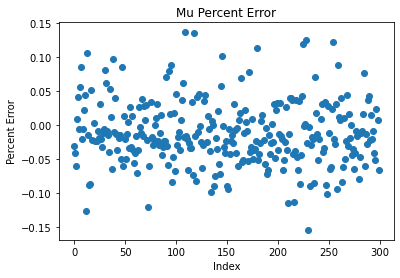

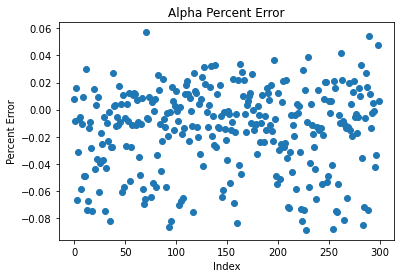

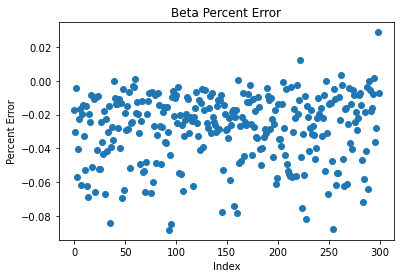

In [10]:
#percent error
plt.scatter(range(len(x_test)), (predictions[0]-y_test[0]))
#plt.yscale('log')
plt.title('Mu Percent Error')
plt.xlabel('Index')
plt.ylabel('Percent Error')
plt.show()
plt.scatter(range(len(x_test)), (predictions[1]-y_test[1]))
#plt.yscale('log') 
plt.title('Alpha Percent Error') 
plt.xlabel('Index')
plt.ylabel('Percent Error') 
plt.show()
plt.scatter(range(len(x_test)), (predictions[2]-y_test[2]))
#plt.yscale('log') 
plt.title('Beta Percent Error') 
plt.xlabel('Index')
plt.ylabel('Percent Error') 
plt.show()

In [ ]:
plt.hist(predictions[0]-y_test[0])
plt.title('Distribution of Mu Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()

plt.hist(predictions[1]-y_test[1])
plt.title('Distribution of Alpha Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()

plt.hist(predictions[2]-y_test[2])
plt.title('Distribution of Beta Errors')
plt.ylabel('Number of Occurences')
plt.xlabel('Absolute Error')
plt.show()